In [1]:
import base64
import chardet
import pprint
import requests
from IPython.display import Image

VIRASANA_URL = "http://localhost/virasana/"
VIRASANA_URL = "http://10.68.64.12/virasana/"

# Realizando consulta no BD

In [9]:
r = requests.get(VIRASANA_URL + "grid_data", params={'metadata.numeroinformado': 'TRIU8965532'})
print(r.url)
print(r.text)

http://10.68.64.12/virasana/grid_data?metadata.numeroinformado=TRIU8965532
["5d668d02254139b5c56b4438","5d668d03254139b5c56b443a"]



In [10]:
lista_ids = list(r.json())

In [11]:
for _id in lista_ids:
    r = requests.get(VIRASANA_URL + "summary/%s" % _id)
    print(r.url)
    print(r.text)

http://10.68.64.12/virasana/summary/5d668d02254139b5c56b4438
Número contêiner informado pelo recinto
TRIU8965532
Data de escaneamento
2019-08-28 00:00
Data de Carregamento da imagem no sistema
2019-08-28 14:17
Nome Recinto
BTP2
Operação
lci - Importação
CONTÊINER VAZIO

Manifesto - Escala
1519501609278 - 19000240665
Número contêiner - tara
triu8965532 - 4700kg
Data e hora de atracação do Manifesto
24/08/2019 08:15:00
http://10.68.64.12/virasana/summary/5d668d03254139b5c56b443a
Número contêiner informado pelo recinto
TRIU8965532
Data de escaneamento
2019-08-28 00:00
Data de Carregamento da imagem no sistema
2019-08-28 14:17
Nome Recinto
BTP2
ERRO AO BUSCAR DADOS CARGA
Não foi encontrado registro do CARGA na função integracao.carga.summary


In [15]:
imgs = []
for _id in lista_ids:
    r = requests.get(VIRASANA_URL + "image/%s" % _id)
    print(r.url)
    imgs.append(r)

http://10.68.64.12/virasana/image/5d668d02254139b5c56b4438
http://10.68.64.12/virasana/image/5d668d03254139b5c56b443a


In [16]:
encode = chardet.detect(imgs[1].content)
print(encode)
pprint.pprint(bytes(imgs[1].content).decode(encode['encoding']))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
('<DataForm><Version>V01.07</Version><TruckId>2019082700261300NO</TruckId><State>5</State><Site>002613</Site><Date>2019-08-28T00:00:16.727Z</Date><InTraining>0</InTraining><InReference>0</InReference><Archived>0</Archived><InEdition>0</InEdition><Analysed>1</Analysed><CheckedOut>0</CheckedOut><Approved>0</Approved><Pending>0</Pending><AdminData><FileId '
 '/><Custom1>V</Custom1><Comments /><Vehicle><PlateNumber '
 '/><OCR>-1</OCR><Trailers><Trailer><PlateNumber '
 '/><OCR>-1</OCR><Containers><Container><ContainerId>TRIU8965532</ContainerId><OCR>91</OCR></Container><Container><ContainerId '
 '/><OCR>-1</OCR></Container></Containers></Trailer></Trailers><Driver '
 '/></Vehicle></AdminData><ProcessInstructions><InspectionType Value="0" '
 '/><EnergyLevel Value="0" '
 '/><PendingRequired>0</PendingRequired><ScanPosition>0</ScanPosition><HEDRequired>0</HEDRequired><Speed>24</Speed><IsContainerEmpty>0</IsContainerEmpty></ProcessInstruc

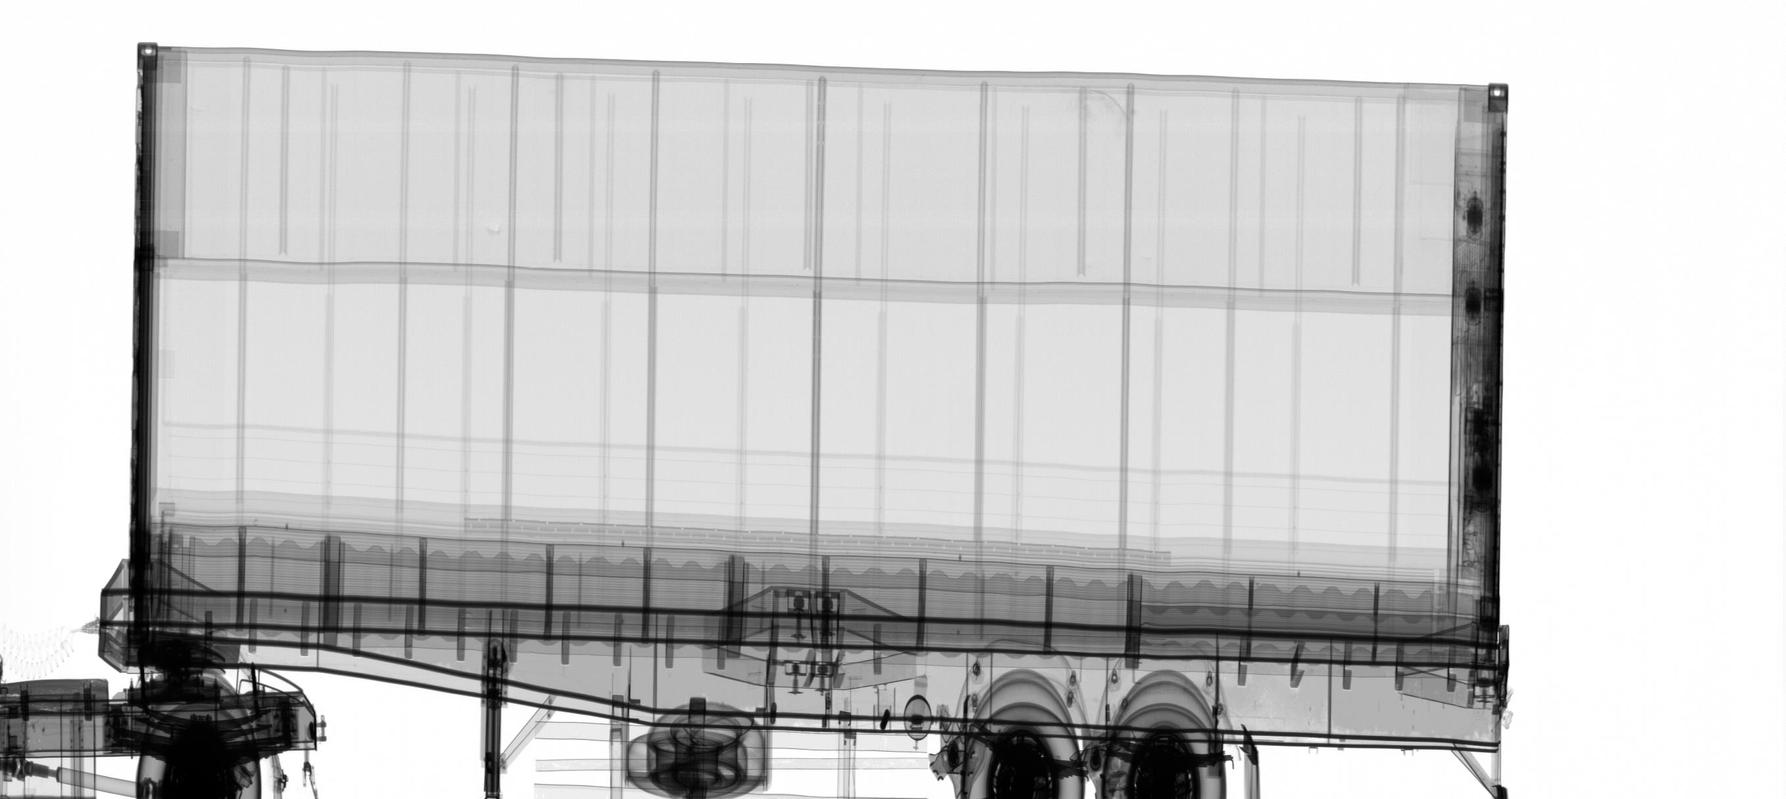

In [17]:
Image(imgs[0].content)

In [18]:
r = requests.get(VIRASANA_URL + "mini1/%s" % lista_ids[1])
print(r.url)
Image(r.content)

http://10.68.64.12/virasana/mini1/5d668d03254139b5c56b443a


In [19]:
r = requests.get(VIRASANA_URL + "mini2/%s" % lista_ids[1])
print(r.url)
Image(r.content)

http://10.68.64.12/virasana/mini2/5d668d03254139b5c56b443a


In [10]:
r = requests.get(VIRASANA_URL + "json/%s" % lista_ids[1])
print(r.url)
pprint.pprint(r.json())

http://localhost/virasana/json/5c5309281004b3779c37d3a2
{'UNIDADE': 'ALFSTS:',
 'carga': {'atracacao': {'_id': {'$oid': '5c5342e31004b333d727dced'},
                         'codigoterminal': 'brssz016',
                         'dataatracacao': '02/07/2017',
                         'dataatracacaoiso': {'$date': 1498969560000},
                         'datadesatracacao': '03/07/2017',
                         'escala': '17000205049',
                         'horaatracacao': '04:26:00',
                         'horadesatracacao': '12:50:00',
                         'localatracacao': 'santos brasil quay 2',
                         'nometerminal': 'santos brasil',
                         'situacao': 'atracada'},
           'conhecimento': [{'_id': {'$oid': '5c53495b1004b33a1640f42d'},
                             'codigoagentenavegacao': '02427026000146',
                             'codigoportodestino': 'aejea',
                             'codigoportoorigem': 'brssz',
         